In [1]:
import numpy as np
import matplotlib.pyplot as plt
import deepxde as dde 
from analytical import sound_hard_circle


#dde.config.set_default_float('float64')
#dde.config.set_default_float('float64')
dde.config.set_default_float('float32')


'''                        Problem parameters                               '''
k0 = 1       # wavenumber
# 5 is fine!
# 8 is more or less ok. ¿Add more points?
# Added more points, but not really ok with just 20.000 iterations + BFGS
# Change the learning rate? 
# Avec8 et 15 points, learning rate = 0.05, n'arrive pas a apprendre l'interieur...

d = np.array([1., 1.])
d /= np.linalg.norm(d)

wave_len = 2*np.pi / k0  # wavelength

dim_x = 2 * np.pi
n_wave = 20

# The mesh element size is h_elem
h_elem = wave_len / n_wave

nx = int(dim_x / h_elem)
print(h_elem, 'h_elem')
print( nx, 'nx')
print(nx **2, 'nx**2')

Using backend: tensorflow.compat.v1

2022-04-28 19:26:03.236780: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0


Instructions for updating:
non-resource variables are not supported in the long term

Set the default float type to float32
0.3141592653589793 h_elem
20 nx
400 nx**2


Compiling model...
Building feed-forward neural network...
'build' took 0.045958 s



/usr/local/lib/python3.7/dist-packages/skopt/sampler/sobol.py:250: UserWarning: The balance properties of Sobol' points require n to be a power of 2. 0 points have been previously generated, then: n=0+402=402. 
  total_n_samples))
/usr/local/lib/python3.7/dist-packages/skopt/sampler/sobol.py:250: UserWarning: The balance properties of Sobol' points require n to be a power of 2. 0 points have been previously generated, then: n=0+84=84. 
  total_n_samples))
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/legacy_tf_layers/core.py:171: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  warnings.warn('`tf.layers.dense` is deprecated and '
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/base_layer_v1.py:1692: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  warnings.warn('`layer.apply` is deprecate

'compile' took 4.734775 s

Initializing variables...
Training model...



2022-04-28 19:26:19.754228: I tensorflow/core/platform/profile_utils/cpu_utils.cc:114] CPU Frequency: 3000030000 Hz
2022-04-28 19:26:19.893631: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcublas.so.11


Step      Train loss                                  Test loss                                   Test metric   
0         [4.82e-02, 9.87e-02, 1.77e-01, 3.96e+01]    [4.85e-02, 8.57e-02, 1.77e-01, 3.96e+01]    [1.18e+00]    


2022-04-28 19:26:20.287666: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcublasLt.so.11


1000      [1.48e-04, 1.93e-02, 6.64e-05, 2.41e-03]    [1.40e-04, 1.48e-02, 6.64e-05, 2.41e-03]    [7.29e-01]    
2000      [1.08e-04, 2.40e-03, 2.35e-05, 4.00e-04]    [1.02e-04, 1.86e-03, 2.35e-05, 4.00e-04]    [6.93e-01]    
3000      [5.02e-05, 4.74e-04, 7.85e-06, 6.15e-05]    [4.42e-05, 3.92e-04, 7.85e-06, 6.15e-05]    [6.86e-01]    
4000      [2.32e-05, 2.23e-04, 5.61e-06, 4.68e-05]    [2.12e-05, 1.94e-04, 5.61e-06, 4.68e-05]    [6.86e-01]    
5000      [1.58e-05, 1.41e-04, 4.61e-06, 2.52e-05]    [1.44e-05, 1.25e-04, 4.61e-06, 2.52e-05]    [6.89e-01]    
6000      [1.25e-05, 9.81e-05, 2.90e-06, 1.71e-05]    [1.20e-05, 8.34e-05, 2.90e-06, 1.71e-05]    [6.92e-01]    
7000      [1.07e-05, 7.71e-05, 1.79e-06, 1.04e-05]    [1.07e-05, 6.67e-05, 1.79e-06, 1.04e-05]    [6.95e-01]    
8000      [2.17e-05, 7.56e-04, 1.80e-04, 4.14e-03]    [2.12e-05, 7.67e-04, 1.80e-04, 4.14e-03]    [7.00e-01]    
9000      [2.95e-04, 1.59e-02, 9.91e-04, 5.06e-03]    [2.84e-04, 1.23e-02, 9.91e-04, 5.06e-03]  

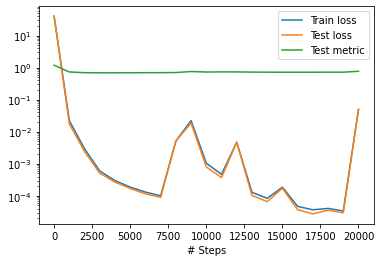

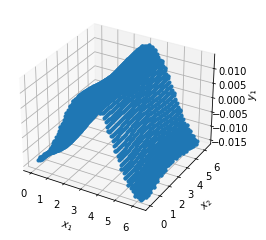

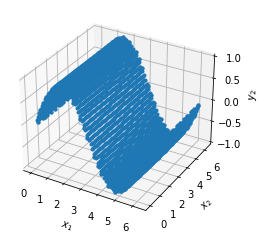

In [2]:
geom = dde.geometry.Rectangle([0, 0], [dim_x, dim_x])

def pde(x, y):
    y0, y1 = y[:, 0:1], y[:, 1:2]
    
    y0_xx = dde.grad.hessian(y, x, component=0, i=0, j=0)
    y0_yy = dde.grad.hessian(y, x, component=0, i=1, j=1)

    y1_xx = dde.grad.hessian(y, x,component=1, i=0, j=0)
    y1_yy = dde.grad.hessian(y, x,component=1, i=1, j=1)

    return [-y0_xx - y0_yy - k0 ** 2 * y0,
            -y1_xx - y1_yy - k0 ** 2 * y1]

def sol(x):
    return np.exp(1j * k0 * x[:, 0:1])

def boundary(_, on_boundary):
    return on_boundary

def func0(x):
    normal = geom.boundary_normal(x)
    w = 1j * k0 * np.exp(1j * k0 * x[:, 0:1])
    result = w * normal[:, 0:1]
    #result = np.exp(1j * k0 * x[:, 0:1])
    result = -k0 * np.sin(k0 * x[:, 0:1]) * normal[:, 0:1]
    return(result)
    #return np.real(result)

def func1(x):
    normal = geom.boundary_normal(x)
    w = 1j * k0 * np.exp(1j * k0 * x[:, 0:1])
    #result = w * normal[:, 0:1]
    #return np.imag(result)
    result = k0 * np.cos(k0 * x[:, 0:1]) * normal[:, 0:1]
    return result

bc0 = dde.NeumannBC(geom, func0, boundary, component = 0)
bc1 = dde.NeumannBC(geom, func1, boundary, component = 1)

def func(x):
    real = np.real(np.exp(1j * k0 * x[:, 0:1]))
    imag = np.imag(np.exp(1j * k0 * x[:, 0:1]))
    return np.hstack((real, imag))

bcs = [bc0, bc1]
weights = [1, 1, 100, 100]

data = dde.data.PDE(geom, pde, bcs, num_domain= nx**2, num_boundary= 4 * nx, num_test= 10 * nx ** 2, solution = func)
net = dde.maps.FNN([2] + [50] * 4 + [2], "tanh", "Glorot uniform")
model = dde.Model(data, net)

model.compile("adam", lr=0.001, loss_weights= weights, metrics=["l2 relative error"])
losshistory, train_state = model.train(epochs=20000)

dde.saveplot(losshistory, train_state, issave=True, isplot=True)

#model.compile("L-BFGS")
#losshistory, train_state = model.train()

Relative error =  0.7506844665517196


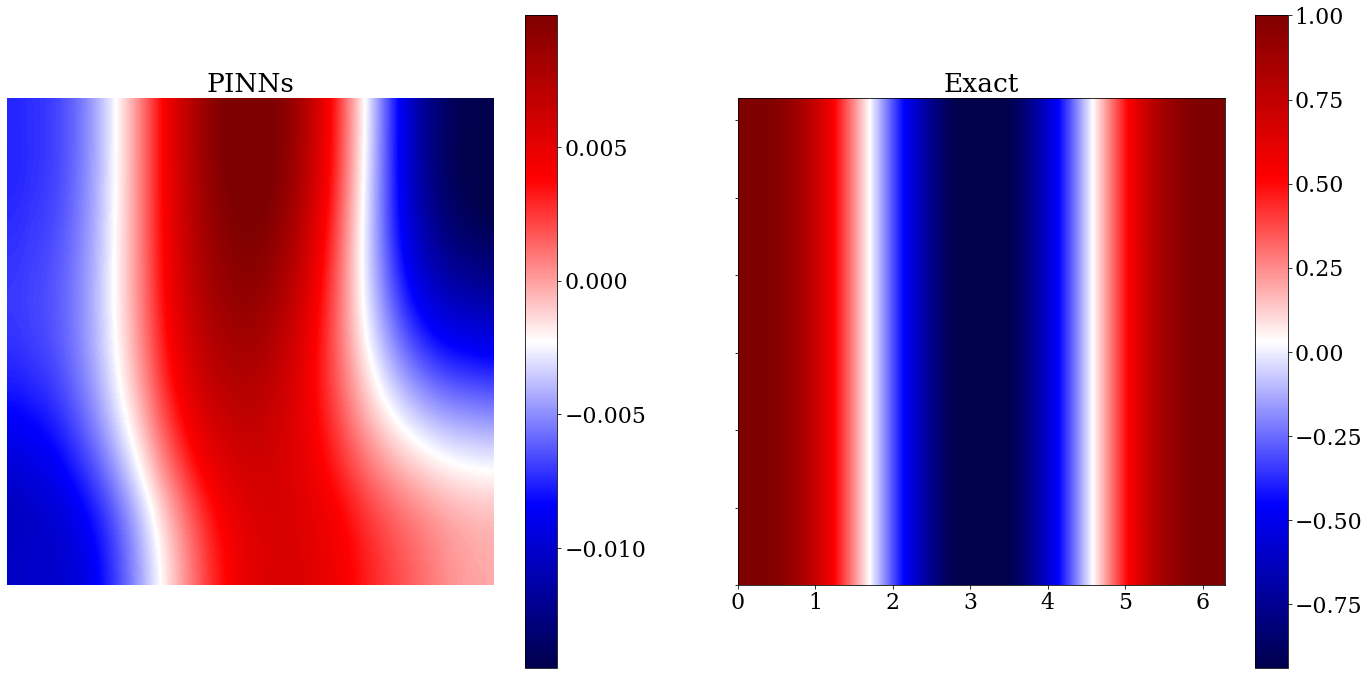

In [9]:

'''            Evaluate field over a specified grid of points              '''
# Square grid with 10 points per wavelength in each direction
Nx = int(np.ceil(dim_x/wave_len * 10))
Ny = Nx

# Grid points
xmin, xmax, ymin, ymax = [0, dim_x, 0, dim_x]
plot_grid = np.mgrid[xmin:xmax:Nx * 1j, ymin:ymax:Ny * 1j]
points = np.vstack((plot_grid[0].ravel(),
                    plot_grid[1].ravel(),
                    np.zeros(plot_grid[0].size)))

points_2d = points[:2, :]

#in_circ = points[0, :]**2 + points[1, :]**2 <= (radius)**2
#in_circ_2d = points_2d[0, :]**2 + points_2d[1, :]**2 <= (radius)**2
#points[0, in_circ] = -radius - wave_len / 10
#points[1, in_circ] = radius + wave_len / 10
#points[2, in_circ] = 0.

# Bounding box tree etc for function evaluations

u_sca = model.predict(points[:2, :].T)
u_sca = u_sca[:, 0] + 1j* u_sca[:, 1]
u_sca = u_sca.reshape((Nx, Ny))

'''                  Compare against analytical solution                    '''
# Uncomment to perform comparison, takes a few seconds to run

u_exact = sol(points.T)
u_exact = u_exact.reshape((Nx, Ny))
diff = u_exact-u_sca
error = np.linalg.norm(diff)/np.linalg.norm(u_exact)
print('Relative error = ', error)

'''                     Plot field and save figure                          '''
plt.rc('font', family='serif', size=22)

fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize = (24,12))

pcm = ax1.imshow(np.fliplr(np.real(u_sca)).T,
           extent=[0,dim_x,0,dim_x],
           cmap=plt.cm.get_cmap('seismic'), interpolation='spline16', label='PINN')

ax1.axis('off')
fig.colorbar(pcm, ax = ax1)

pcm = ax2.imshow(np.fliplr(np.real(u_exact)).T,
           extent=[0,dim_x,0,dim_x],
           cmap=plt.cm.get_cmap('seismic'), interpolation='spline16', label = 'Exact')


#ax1.axis('off')
ax1.set_title('PINNs')
ax2.set_title('Exact')
fig.colorbar(pcm, ax = ax2)


NameError: name 'u_sca' is not defined

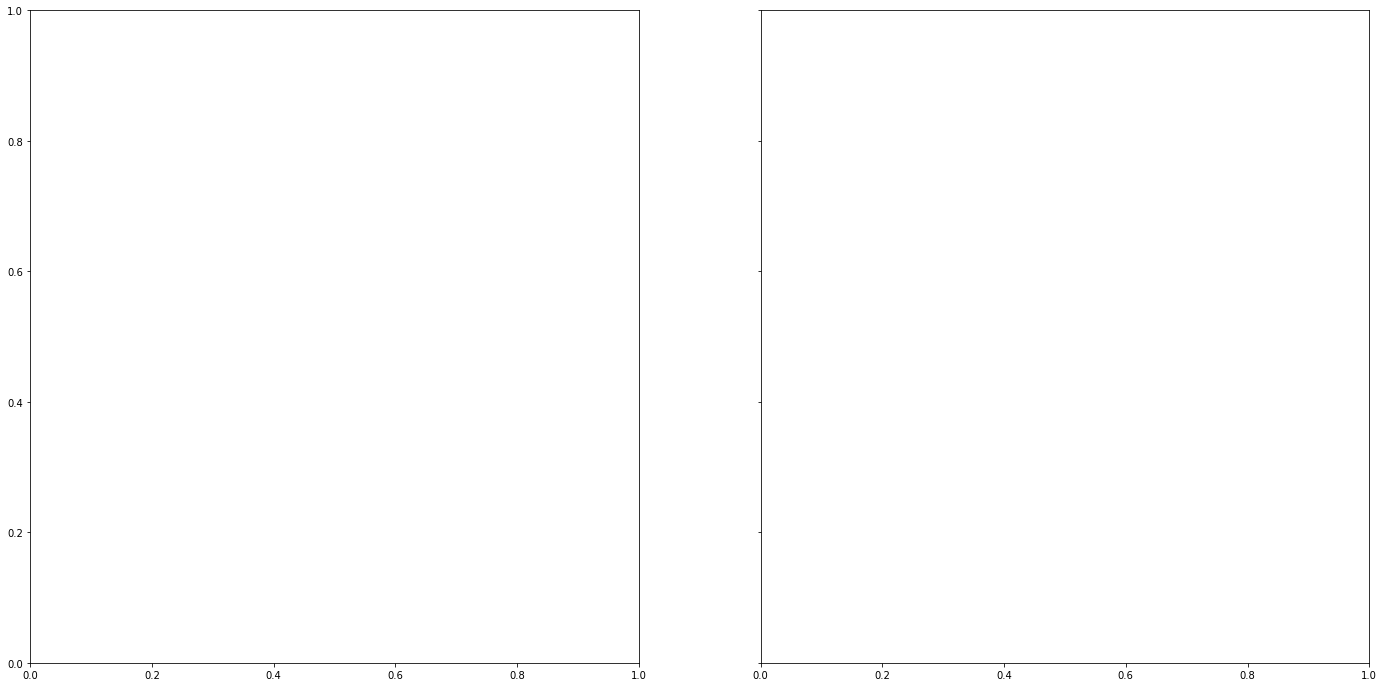

In [4]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize = (24,12))

pcm = ax1.imshow(np.fliplr(np.imag(u_sca)).T,
           extent=[0,dim_x,0,dim_x],
           cmap=plt.cm.get_cmap('seismic'), interpolation='spline16', label='PINN')


ax1.axis('off')
fig.colorbar(pcm, ax = ax1)

pcm = ax2.imshow(np.fliplr(np.imag(u_exact)).T,
           extent=[0,dim_x,0,dim_x],
           cmap=plt.cm.get_cmap('seismic'), interpolation='spline16', label = 'Exact')

ax1.axis('off')
ax1.set_title('PINNs')
ax2.set_title('Exact')
fig.colorbar(pcm, ax = ax2)


In [ ]:
x = geom.random_boundary_points(100)
normal = geom.boundary_normal(x)


In [ ]:
fig = plt.figure(figsize = (8,8))
plt.scatter(x[:,0], x[:,1], color = 'k')
plt.scatter(points_2d[0, :], points_2d[1,:], color = 'g')
npts = x.shape[0]
for i in range(npts):
    #plt.text(x[i,0], x[i,1], str(normal[i,0]))
    plt.arrow(x[i,0], x[i,1], normal[i,0], normal[i,1], color = 'b', head_width = .1)